# **APRENDIZAGEM SUPERVISIONADA: REGRESSÃO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever o valor de CO2 adsorvido em amostras de biomassas. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import seaborn as sns

In [2]:
df = pd.read_excel('./df.xlsx')
df.head(5)

,Amostras,CO2_Uptake,BET,Vol_pore,Vol_micro,Impregnation ration (chemicals:biomass),"Method preparation (1 - Dry, 2 - Wet)",Temperature Activation (°C),"Step preparation (1 - Pre pirolised, 2 raw)"
0,BA-1,1.33,57.850,0.02325,0.030730,1,1,450,1
1,MA-1,1.15,9.045,0.00300,0.014130,1,1,450,1
2,MABA-1,1.11,68.257,0.03800,0.024050,1,1,450,1
3,BA-2,0.19,0.000,0.00000,0.000000,1,1,450,2
4,MA-2,0.58,3.370,0.00100,0.005062,1,1,450,2


In [3]:
df.shape

(21, 9)

In [4]:
col =["CO2_Uptake", "BET", "Vol_pore", "Vol_micro"]
df.loc[:, col].describe()

,CO2_Uptake,BET,Vol_pore,Vol_micro
count,21.000000,21.000000,21.000000,21.000000
mean,0.793810,29.048667,0.010726,0.016723
std,0.588434,31.452001,0.011917,0.014901
min,0.000000,0.000000,0.000000,0.000000
25%,0.230000,3.370000,0.001000,0.000000
50%,0.760000,15.487000,0.006000,0.014820
75%,1.110000,57.850000,0.019000,0.025850
max,2.200000,105.575000,0.038000,0.053240


**Atributos previsores**

BET: BET Surface area (m2/g)

Vol_pore: Volume total de poros (cm3/g)

Vol_micro: Volume médio de microporos (cm3/g)


**Variável alvo**

CO2_Uptake: é o valor de Captura de CO2 (mmol/g).

## **CORRELAÇÃO LINEAR**

In [5]:
df.head()

,Amostras,CO2_Uptake,BET,Vol_pore,Vol_micro,Impregnation ration (chemicals:biomass),"Method preparation (1 - Dry, 2 - Wet)",Temperature Activation (°C),"Step preparation (1 - Pre pirolised, 2 raw)"
0,BA-1,1.33,57.850,0.02325,0.030730,1,1,450,1
1,MA-1,1.15,9.045,0.00300,0.014130,1,1,450,1
2,MABA-1,1.11,68.257,0.03800,0.024050,1,1,450,1
3,BA-2,0.19,0.000,0.00000,0.000000,1,1,450,2
4,MA-2,0.58,3.370,0.00100,0.005062,1,1,450,2


### Análise da Normalidade

Teste Shapiro-Wilk (Adequado para conjunto de dados reduzidos, n<30)

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

### CO2 Uptake

In [6]:
#Shapiro-wilk test

stats.shapiro(df["CO2_Uptake"])

ShapiroResult(statistic=0.9496497511863708, pvalue=0.3354896605014801)

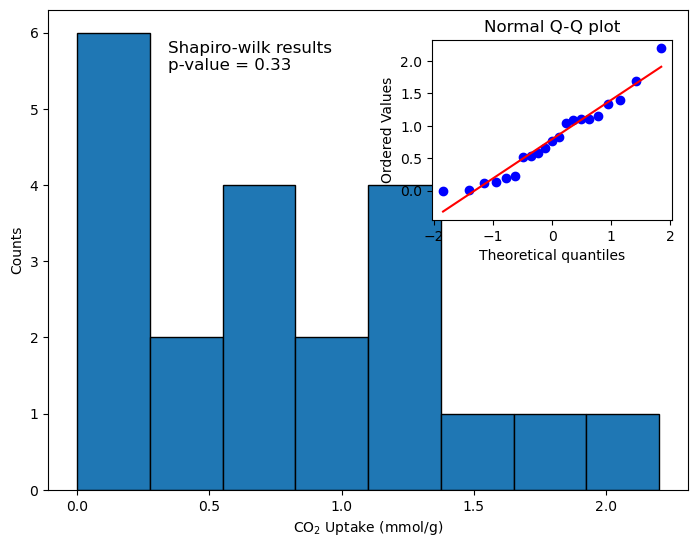

In [7]:
# Crie a figura 1
fig1 = plt.figure(figsize=(8, 6))

# Crie um único eixo na figura 1
ax1 = fig1.add_axes([0.1, 0.1, 0.8, 0.8])  # Define as coordenadas [left, bottom, width, height] do eixo

# Configura o histograma no eixo 1
ax1.hist(df["CO2_Uptake"], bins=8, edgecolor='k')
ax1.set_xlabel('CO$_2$ Uptake (mmol/g)')
ax1.set_ylabel('Counts')

# Crie a figura 2 dentro do eixo 1
inset_ax = fig1.add_axes([0.58, 0.55, 0.3, 0.3])  # Define as coordenadas para o subplot da figura 2
stats.probplot(df['CO2_Uptake'], dist="norm", plot=inset_ax)
inset_ax.set_title("Normal Q-Q plot")

# Adicione texto à figura 1
fig1.text(0.25, 0.8, 'Shapiro-wilk results\np-value = 0.33', fontsize=12, color='k')

# Mostrar a figura 1 com a figura 2 dentro dela
plt.show()



### BET

In [8]:
estatistica, p = stats.shapiro(df["BET"])
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.8464688062667847
p-valor: 0.0036947610788047314


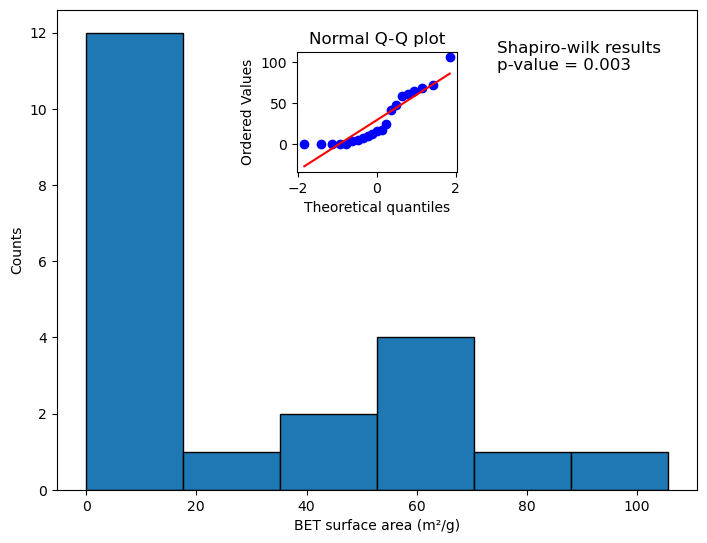

In [9]:
# Crie a figura 1
fig1 = plt.figure(figsize=(8, 6))

# Crie um único eixo na figura 1
ax1 = fig1.add_axes([0.1, 0.1, 0.8, 0.8])  # Define as coordenadas [left, bottom, width, height] do eixo

# Configura o histograma no eixo 1
ax1.hist(df["BET"], bins=6, edgecolor='k')
ax1.set_xlabel('BET surface area (m²/g)')
ax1.set_ylabel('Counts')

# Crie a figura 2 dentro do eixo 1
inset_ax = fig1.add_axes([0.4, 0.63, 0.2, 0.2])  # Define as coordenadas para o subplot da figura 2
stats.probplot(df['BET'], dist="norm", plot=inset_ax)
inset_ax.set_title("Normal Q-Q plot")

# Adicione texto à figura 1
fig1.text(0.65, 0.8, 'Shapiro-wilk results\np-value = 0.003', fontsize=12, color='k')

# Mostrar a figura 1 com a figura 2 dentro dela
plt.show()

### Vol_micro

In [10]:
estatistica, p = stats.shapiro(df["Vol_micro"])
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9159526824951172
p-valor: 0.07205461710691452


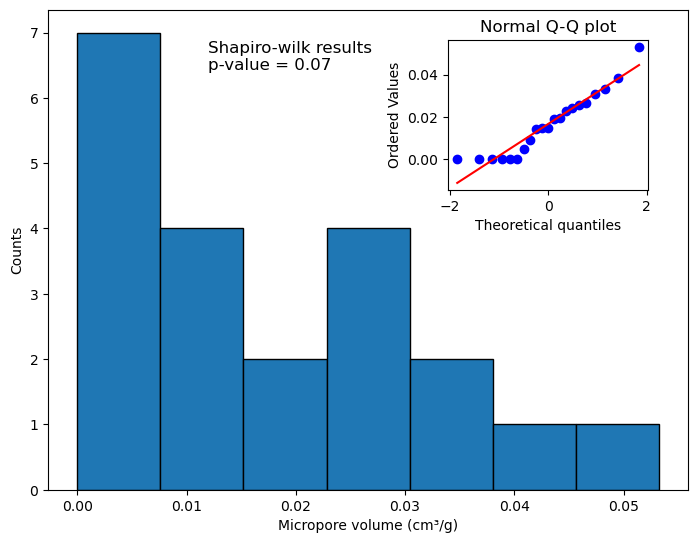

In [11]:
# Crie a figura 1
fig1 = plt.figure(figsize=(8, 6))

# Crie um único eixo na figura 1
ax1 = fig1.add_axes([0.1, 0.1, 0.8, 0.8])  # Define as coordenadas [left, bottom, width, height] do eixo

# Configura o histograma no eixo 1
ax1.hist(df["Vol_micro"], bins=7, edgecolor='k')
ax1.set_xlabel('Micropore volume (cm³/g)')
ax1.set_ylabel('Counts')

# Crie a figura 2 dentro do eixo 1
inset_ax = fig1.add_axes([0.6, 0.6, 0.25, 0.25])  # Define as coordenadas para o subplot da figura 2
stats.probplot(df['Vol_micro'], dist="norm", plot=inset_ax)
inset_ax.set_title("Normal Q-Q plot")

# Adicione texto à figura 1
fig1.text(0.3, 0.8, 'Shapiro-wilk results\np-value = 0.07', fontsize=12, color='k')

# Mostrar a figura 1 com a figura 2 dentro dela
plt.show()

### Vol_pore

In [12]:
estatistica, p = stats.shapiro(df["Vol_pore"])
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.8411687612533569
p-valor: 0.0030037397518754005


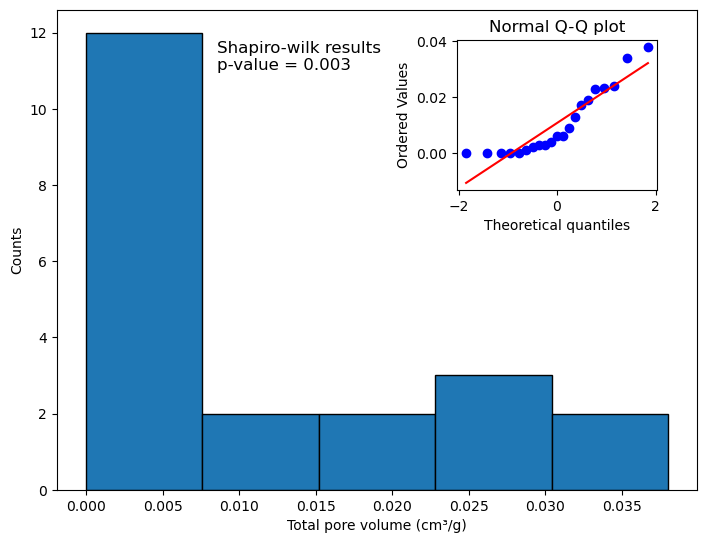

In [13]:
# Crie a figura 1
fig1 = plt.figure(figsize=(8, 6))

# Crie um único eixo na figura 1
ax1 = fig1.add_axes([0.1, 0.1, 0.8, 0.8])  # Define as coordenadas [left, bottom, width, height] do eixo

# Configura o histograma no eixo 1
ax1.hist(df["Vol_pore"], bins=5, edgecolor='k')
ax1.set_xlabel('Total pore volume (cm³/g)')
ax1.set_ylabel('Counts')

# Crie a figura 2 dentro do eixo 1
inset_ax = fig1.add_axes([0.6, 0.6, 0.25, 0.25])  # Define as coordenadas para o subplot da figura 2
stats.probplot(df['Vol_pore'], dist="norm", plot=inset_ax)
inset_ax.set_title("Normal Q-Q plot")

# Adicione texto à figura 1
fig1.text(0.3, 0.8, 'Shapiro-wilk results\np-value = 0.003', fontsize=12, color='k')

# Mostrar a figura 1 com a figura 2 dentro dela
plt.show()


Distribuição normal: CO2 Uptake e Vol_micro


Não tem distribuição normal: BET e vol_pore

### Correlação Linear

Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [14]:
# Pearson
coef,p = stats.pearsonr(df["CO2_Uptake"], df["Vol_micro"])
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.9275891747427594
p-valor: 1.4520047226089255e-09


In [15]:
#  Pearson
correlacoes_pearson = df[["CO2_Uptake", "Vol_micro"]].corr(method='pearson')
correlacoes_pearson

,CO2_Uptake,Vol_micro
CO2_Uptake,1.000000,0.927589
Vol_micro,0.927589,1.000000


In [16]:
#  Kendall
correlacoes_bet = df[["CO2_Uptake", "BET"]].corr(method='kendall')
correlacoes_bet

,CO2_Uptake,BET
CO2_Uptake,1.000000,0.650524
BET,0.650524,1.000000


In [17]:
#  Kendall
correlacoes_pore = df[["CO2_Uptake", "Vol_pore"]].corr(method='kendall')
correlacoes_pore

,CO2_Uptake,Vol_pore
CO2_Uptake,1.000000,0.634138
Vol_pore,0.634138,1.000000


In [18]:
#  Kendall
correlacoes_vol_micro = df[["Vol_micro", "BET"]].corr(method='kendall')
correlacoes_vol_micro

,Vol_micro,BET
Vol_micro,1.00000,0.83551
BET,0.83551,1.00000


In [19]:
#  Kendall
correlacoes_vol_pore = df[["Vol_pore", "BET"]].corr(method='kendall')
correlacoes_vol_pore

,Vol_pore,BET
Vol_pore,1.000000,0.934685
BET,0.934685,1.000000


In [20]:
#  Kendall
correlacoes = df[["CO2_Uptake", "Vol_pore", "BET"]].corr(method='kendall')
correlacoes

,CO2_Uptake,Vol_pore,BET
CO2_Uptake,1.000000,0.634138,0.650524
Vol_pore,0.634138,1.000000,0.934685
BET,0.650524,0.934685,1.000000


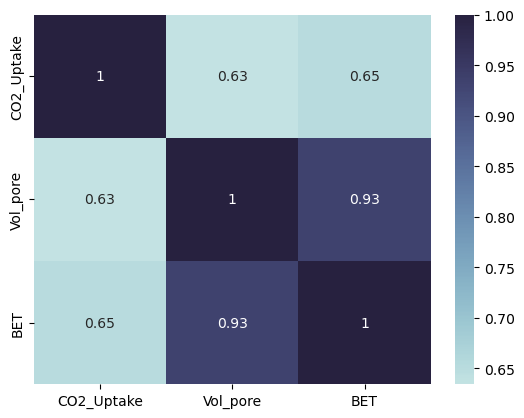

In [21]:
plt.figure()
sns.heatmap(correlacoes, annot=True, cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True));

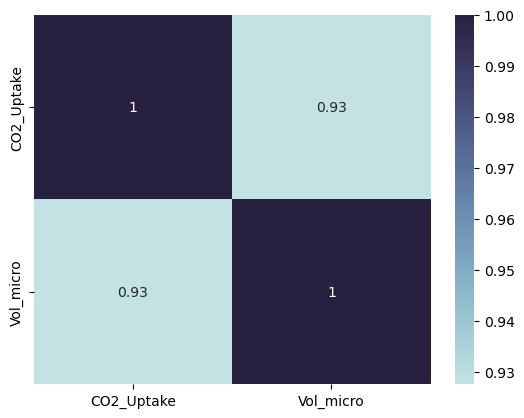

In [22]:
plt.figure()
sns.heatmap(correlacoes_pearson, annot=True, cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True));

## **REGRESSÃO LINEAR SIMPLES**

### Ver o R2 de cada variável 

In [23]:
df.head(2)

,Amostras,CO2_Uptake,BET,Vol_pore,Vol_micro,Impregnation ration (chemicals:biomass),"Method preparation (1 - Dry, 2 - Wet)",Temperature Activation (°C),"Step preparation (1 - Pre pirolised, 2 raw)"
0,BA-1,1.33,57.850,0.02325,0.03073,1,1,450,1
1,MA-1,1.15,9.045,0.00300,0.01413,1,1,450,1


In [24]:
# BET
x1 = df.iloc[:,2:3].values

# Vol_pore
x2 = df.iloc[:, 3:4]

# Vol_micro
x3 = df.iloc[:,4:5].values


In [25]:
# CO2_Uptake
y = df.iloc[:, 1].values

In [26]:
    #ver o R2 da regressão para BET
    model_BET = LinearRegression()
    model_BET.fit(x1, y)
    R2_BET = model_BET.score(x1, y)
    R2_BET

0.6422423114826887

In [27]:
   #ver o R2 da regressão para Vol_pore
   model_pore = LinearRegression()
   model_pore.fit(x2, y)
   R2_pore = model_pore.score(x2, y)
   R2_pore

0.5759247589678863

In [28]:
   #ver o R2 da regressão para Vol_micro
   model_micro = LinearRegression()
   model_micro.fit(x3, y)
   R2_micro = model_micro.score(x3, y)
   R2_micro

0.8604216770999533

## **REGRESSÃO LINEAR MÚLTIPLA**

In [29]:
df.head(2)

,Amostras,CO2_Uptake,BET,Vol_pore,Vol_micro,Impregnation ration (chemicals:biomass),"Method preparation (1 - Dry, 2 - Wet)",Temperature Activation (°C),"Step preparation (1 - Pre pirolised, 2 raw)"
0,BA-1,1.33,57.850,0.02325,0.03073,1,1,450,1
1,MA-1,1.15,9.045,0.00300,0.01413,1,1,450,1


In [30]:
independente = df.iloc[:,[2,4]].values

In [31]:
dependente = df.iloc[:, 1].values

In [32]:
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.2, random_state = 20)

In [33]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

LinearRegression()

In [34]:
multipla.intercept_

0.14307215586250488

In [35]:
multipla.coef_

array([-3.36007965e-03,  4.53271198e+01])

In [36]:
print("Equação: CO2 Uptake = ({:.2f} + ({:.2f})*BET + ({:.2f})*micro".format(multipla.intercept_, multipla.coef_[0], multipla.coef_[1]))

Equação: CO2 Uptake = (0.14 + (-0.00)*BET + (45.33)*micro


In [37]:
# Coeficiente de Determinação do treino
multipla.score(x_treino, y_treino)

0.9333766800547975

In [38]:
y_predict_treino = multipla.predict(x_treino)


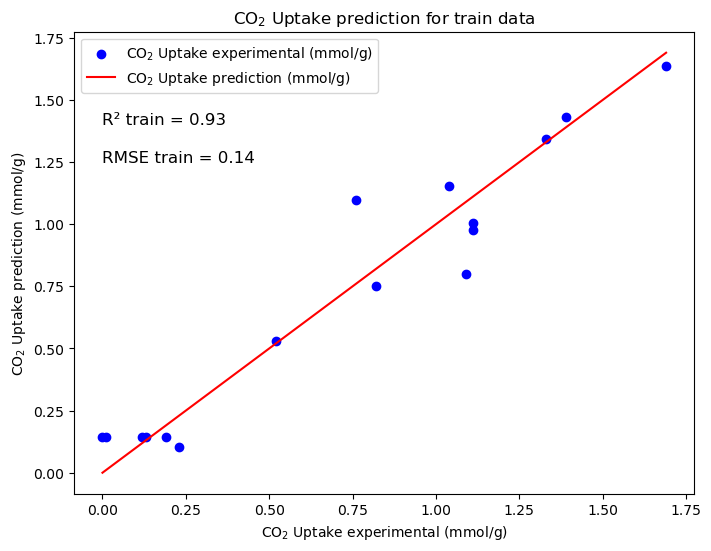

In [39]:
# Redimensiona os dados
y_treino = y_treino.reshape(-1, 1)
y_predict_treino = y_predict_treino.reshape(-1, 1)

# Calcula R² e RMSE
r2 = multipla.score(x_treino, y_treino)
rmse = np.sqrt(mean_squared_error(y_treino, y_predict_treino))

# Cria o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(y_treino, y_predict_treino, color='blue', label='CO$_2$ Uptake experimental (mmol/g)')
plt.plot([y_treino.min(), y_treino.max()], [y_treino.min(), y_treino.max()], color='red', label='CO$_2$ Uptake prediction (mmol/g)')
plt.xlabel('CO$_2$ Uptake experimental (mmol/g)')
plt.ylabel("CO$_2$ Uptake prediction (mmol/g)")
plt.title("CO$_2$ Uptake prediction for train data")
plt.legend()


# Marca o valor de R² e RMSE no gráfico
plt.text(y.min(), y.max() - 0.8, f'R² train = {r2:.2f}', fontsize=12, color='k')
plt.text(y.min(), y.max() - 0.95, f'RMSE train = {rmse:.2f}', fontsize=12, color='k')

# Mostra o gráfico
plt.show()



**TESTE**

In [40]:
previsoes = multipla.predict(x_teste)
previsoes

array([0.8717235 , 1.14542454, 2.2015476 , 0.36119457, 0.75315244])

In [41]:
y_teste

array([0.54, 0.66, 2.2 , 0.58, 1.15])

In [42]:
# Fazendo previsões para valores distintos
valor_CO2 = multipla.predict([[105.575,0.053]])
valor_CO2

array([2.19066909])

In [43]:
# Coeficiente de Determinação do teste
multipla.score(x_teste, y_teste)

0.7192448929599087

In [44]:
y_predict_teste = multipla.predict(x_teste)


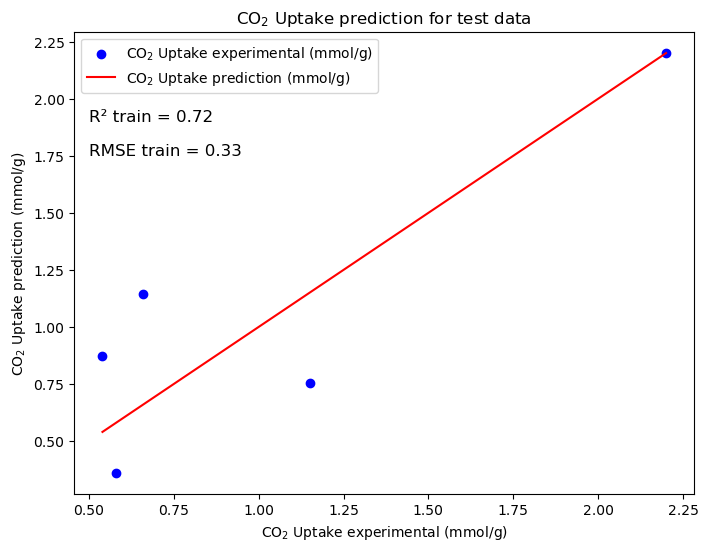

In [45]:
# Redimensiona os dados
y_teste = y_teste.reshape(-1, 1)
y_predict_teste = y_predict_teste.reshape(-1, 1)

# Calcula R² e RMSE
r2 = multipla.score(x_teste, y_teste)
rmse = np.sqrt(mean_squared_error(y_teste, y_predict_teste))

# Cria o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(y_teste, y_predict_teste, color='blue', label='CO$_2$ Uptake experimental (mmol/g)')
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], color='red', label='CO$_2$ Uptake prediction (mmol/g)')
plt.xlabel('CO$_2$ Uptake experimental (mmol/g)')
plt.ylabel("CO$_2$ Uptake prediction (mmol/g)")
plt.title("CO$_2$ Uptake prediction for test data")
plt.legend()


# Marca o valor de R² e RMSE no gráfico
plt.text(y.min()+0.5, y.max() - 0.3, f'R² test = {r2:.2f}', fontsize=12, color='k')
plt.text(y.min()+0.5, y.max() - 0.45, f'RMSE test = {rmse:.2f}', fontsize=12, color='k')

# Mostra o gráfico
plt.show()

**MÉTRICAS**

In [46]:
# Erro absoluto
abs(y_teste - previsoes).mean()

0.667282626108084

In [47]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes)

0.2868697271433295

In [48]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes)

0.11020873273794565

In [49]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes))

0.3319770063392127

### **Validação Cruzada**

In [50]:
# Separando os dados em folds
kfold = KFold(n_splits = 3, shuffle=True, random_state = 773)

In [51]:
# Inicialize variáveis para armazenar o melhor valor de r2 e o correspondente random_state
melhor_r2 = -1  # Inicializado com um valor negativo para garantir que qualquer r2 real seja maior
melhor_random_state = None

for i in range(1, 1001):
    kfold = KFold(n_splits=3, shuffle=True, random_state=i)
    modelo = LinearRegression()
    resultado = cross_val_score(modelo, independente, dependente, cv=kfold)
    r2_atual = resultado.mean()

    # Verifique se o r2 atual é melhor do que o melhor r2 até agora
    if r2_atual > melhor_r2:
        melhor_r2 = r2_atual
        melhor_random_state = i

print("Melhor random_state:", melhor_random_state)
print("Melhor R²:", melhor_r2)


Melhor random_state: 773
Melhor R²: 0.8853289951875101


In [52]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (melhor_r2 * 100.0))

Coeficiente de Determinação Médio: 88.53%


In [53]:
modelo = LinearRegression()
modelo_final = modelo.fit(independente, dependente)
previsoes_novos_dados = modelo_final.predict([[105.575,0.053]])
previsoes_novos_dados

array([2.07573393])

In [54]:
modelo_final.coef_

array([-9.18769851e-03,  5.47187778e+01])

In [55]:
modelo_final.intercept_

0.14562997762330188

In [56]:
previsao = cross_val_predict(modelo, independente, dependente, cv = kfold)


In [57]:
# Criando uma coluna com previsão
df["CO2 Uptake predict"] = previsao
df.head()

,Amostras,CO2_Uptake,BET,Vol_pore,Vol_micro,Impregnation ration (chemicals:biomass),"Method preparation (1 - Dry, 2 - Wet)",Temperature Activation (°C),"Step preparation (1 - Pre pirolised, 2 raw)",CO2 Uptake predict
0,BA-1,1.33,57.850,0.02325,0.030730,1,1,450,1,1.294288
1,MA-1,1.15,9.045,0.00300,0.014130,1,1,450,1,0.706814
2,MABA-1,1.11,68.257,0.03800,0.024050,1,1,450,1,0.784833
3,BA-2,0.19,0.000,0.00000,0.000000,1,1,450,2,0.180428
4,MA-2,0.58,3.370,0.00100,0.005062,1,1,450,2,0.407847


In [58]:
rmse_final = np.sqrt(mean_squared_error(df["CO2_Uptake"], df["CO2 Uptake predict"]))

c:\Users\Christiano\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


NameError: name 'residuos' is not defined

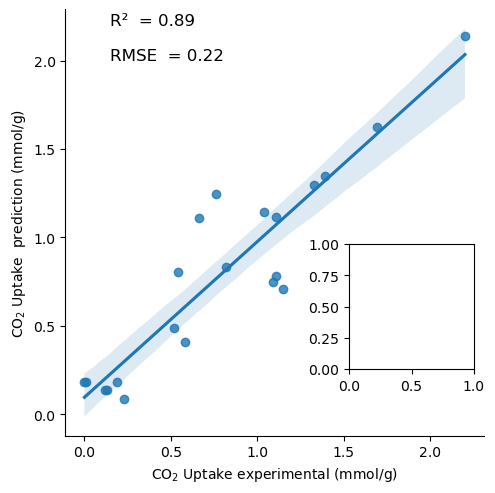

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seu código para criar o gráfico de dispersão linear
sns.lmplot(x='CO2_Uptake', y='CO2 Uptake predict', data=df)
plt.xlabel("CO$_2$ Uptake experimental (mmol/g)")
plt.ylabel("CO$_2$ Uptake  prediction (mmol/g)")
plt.text(y.min()+0.15, y.max() - 0., f'R²  = {melhor_r2:.2f}', fontsize=12, color='k')
plt.text(y.min()+0.15, y.max() - 0.2, f'RMSE  = {rmse_final:.2f}', fontsize=12, color='k')

# Código para criar o histograma dos resíduos
plt.axes([0.7, 0.25, 0.25, 0.25])  # Define as coordenadas e tamanho do sub-gráfico
plt.hist(residuos, bins=10, color='lightblue', edgecolor='black', density=True)
plt.xlabel("Residues")
plt.ylabel("Count")

# Adicione uma linha que representa a distribuição dos resíduos
sns.kdeplot(residuos, color='blue', ax=plt.gca())

# Mostra o gráfico
plt.show()



**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,69/0,52; RMSE = 1.10; R^2 Validação Cruzada: 61.37%

### **Avaliando a Regressão Linear Múltipla com Statsmodels**

In [ ]:
df.head()

,Amostras,CO2_Uptake,BET,Vol_pore,Vol_micro,Impregnation ration (chemicals:biomass),"Method preparation (1 - Dry, 2 - Wet)",Temperature Activation (°C),"Step preparation (1 - Pre pirolised, 2 raw)",CO2 Uptake predict
0,BA-1,1.33,57.850,0.02325,0.030730,1,1,450,1,1.303571
1,MA-1,1.15,9.045,0.00300,0.014130,1,1,450,1,0.742489
2,MABA-1,1.11,68.257,0.03800,0.024050,1,1,450,1,0.952034
3,BA-2,0.19,0.000,0.00000,0.000000,1,1,450,2,0.178801
4,MA-2,0.58,3.370,0.00100,0.005062,1,1,450,2,0.391162


In [ ]:
# Criação do modelo
modelo = smf.ols('CO2_Uptake ~ BET + Vol_pore + Vol_micro', data = df).fit()

In [ ]:
residuos = modelo.resid

#### Teste de Normalidade dos resíduos

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

In [ ]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

#### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

In [ ]:
plt.scatter(y=residuos, x=modelo.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=8, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [ ]:
estatistica, p, f, fp = sms.het_breuschpagan (modelo.resid, modelo.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

#### **Outliers nos resíduos**

(Entre -3 e 3)

In [ ]:
outliers = modelo.outlier_test()

In [ ]:
outliers.max()

In [ ]:
outliers.min()

#### **Ausência de Multicolinearidade**

Somente entre as variáveis independentes.

Considerada multicolinearidade quando r > 0.9.

In [ ]:
variaveis = df[['BET','Vol_pore', 'Vol_micro','Temp']]

In [ ]:
variaveis.head()

In [ ]:
correlacoes = variaveis.corr(method='kendall')
correlacoes

#### **Análise do Modelo**

Intercept

p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

Adjusted R-squared (explicação do modelo através dos dados).

p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [ ]:
print(modelo.summary())

**Equação:** Valor da casa = 4.155e+05 + 8.657e+04.RM - 1.085e+04.LSTAT - 1.949e+04.PTRATIO

In [ ]:
# Criando uma coluna com previsão
df["CO2 Uptake predict"] = modelo.fittedvalues

In [ ]:
df

In [ ]:
sns.lmplot(x='CO2 Uptake predict', y='CO2_Uptake', data=df);

In [ ]:
# Inicialize variáveis para armazenar o melhor valor de r2 e o correspondente random_state
melhor_r2 = -1  # Inicializado com um valor negativo para garantir que qualquer r2 real seja maior
melhor_random_state = None

for i in range(1, 1001):
    kfold = KFold(n_splits=3, shuffle=True, random_state=i)
    modelo = LinearRegression()
    resultado = cross_val_score(modelo, independente, dependente, cv=kfold)
    r2_atual = resultado.mean()

    # Verifique se o r2 atual é melhor do que o melhor r2 até agora
    if r2_atual > melhor_r2:
        melhor_r2 = r2_atual
        melhor_random_state = i

print("Melhor random_state:", melhor_random_state)
print("Melhor R²:", melhor_r2)
    